In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

Stochastic means random. So, in comparison to Batch gradient descent, stochastic gradient descent actually selects a random data point from the given dataset and performs step calculations on it. This makes the learning be random at once, but average out to descend the gradient over time. 

Even after the algorithm reaches the minima of the gradient, it will keep bouncing around and calculating as it's nature is random. This leads to good parameter values, but not optimal ones.
One solution to this issue is to gradually reduce the learning rate the close we get to the minima. The steps start out large which help escape the local minima, but then slow down which lead to a global minima. This is called simulated annealing.
The function that determines the rate of learning at each step is known as the learning schedule.

However, due to this reason the SGD has a better chance of finding the global minima and not just the local minima.

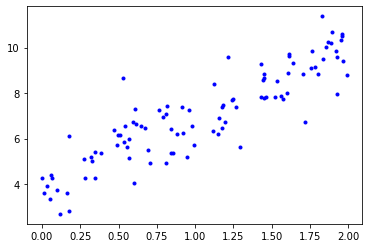

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
plt.plot(X,y, "b.")
plt.show
X_b = np.c_[np.ones((100,1)), X]

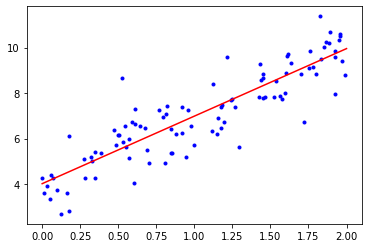

In [3]:
n_epochs = 50 # n_iters
t0, t1 = 5, 50  # learning schedule hyperparameters
m = len(X_b)
theta = np.random.randn(2,1)  # random initialization

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        # slicing it like [a:a+1] is the same as grabbing the X_b[random_index] and converting it to a numpy array
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # 2, not 2/m like BGD as m is always equal to 1
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta*gradients

xTest = np.array([[0], [2]])
xTest_b = np.c_[np.ones((2,1)), xTest]
yPreds = xTest_b.dot(theta)
plt.plot(X,y, "b.")
plt.plot(xTest,yPreds, "r-")
        

xi = X_b[random_index] 
xi = np.array([xi]) <br>
yi = y[random_index]
yi = np.array([yi])

IS THE SAME AS

xi = X_b[random_index:random_index+1] <br>
yi = y[random_index:random_index+1]